In [1]:
import pandas as pd
import numpy as np

import matplotlib ; import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# matplotlib.rc('font', family='NanumGothic')

In [2]:
df=pd.read_csv('~/Downloads/bigdata/유방암.csv', engine='python', encoding='949')
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_x = df.drop('diagnosis',axis=1)
df_y = df['diagnosis']
df_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_x.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,13.010,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208


In [6]:
x_cols = df_x.columns
scaler = StandardScaler()

nd_scaled = scaler.fit_transform(df_x)

print('Scaled Data : \n{}'.format(nd_scaled[:5].round(3)))
print('Shape :\n{}'.format(nd_scaled.shape))

Scaled Data : 
[[ 1.097e+00 -2.073e+00  1.270e+00  9.840e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.650e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.610e-01
   1.149e+00  9.070e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.540e-01  1.686e+00  1.909e+00 -8.270e-01 -4.870e-01
  -2.400e-02  5.480e-01  1.000e-03 -8.690e-01  4.990e-01 -8.760e-01
   2.630e-01  7.420e-01 -6.050e-01 -6.930e-01 -4.410e-01  2.600e-01
  -8.050e-01 -9.900e-02  1.806e+00 -3.690e-01  1.535e+00  1.890e+00
  -3.760e-01 -4.300e-01 -1.470e-01  1.087e+00 -2.440e-01  2.810e-01]
 [ 1.580e+00  4.560e-01  1.567e+00  1.559e+00  9.420e-01  1.053e+00
   1.363e+00  2.037e+00  9.400e-01 -3.980e-01  1.229e+00 -7.800e-01
   8.510e-01  1.181e+00 -2.970e-01  8.150e-01  2.130e-01  1.425e+00
   2.370e-01  2.940e-01  1.512e+00 -2.400e-02  1.347e+00  1.456e+00
   5.270e-01  1.083e+00  8.550e

In [7]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)
df_scaled.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.030,-2.229,-1.985,-1.454,-3.112,-1.610,-1.115,-1.262,-2.744,-1.820,...,-1.727,-2.224,-1.693,-1.222,-2.683,-1.444,-1.306,-1.745,-2.161,-1.602
25%,-0.689,-0.726,-0.692,-0.667,-0.711,-0.747,-0.744,-0.738,-0.703,-0.723,...,-0.675,-0.749,-0.690,-0.642,-0.691,-0.681,-0.757,-0.756,-0.642,-0.692
50%,-0.215,-0.105,-0.236,-0.295,-0.035,-0.222,-0.342,-0.398,-0.072,-0.178,...,-0.269,-0.044,-0.286,-0.341,-0.047,-0.270,-0.218,-0.223,-0.127,-0.216
75%,0.469,0.584,0.500,0.364,0.636,0.494,0.526,0.647,0.531,0.471,...,0.522,0.658,0.540,0.358,0.598,0.540,0.531,0.713,0.450,0.451
max,3.971,4.652,3.976,5.251,4.771,4.568,4.244,3.928,4.485,4.911,...,4.094,3.886,4.287,5.930,3.955,5.113,4.701,2.686,6.046,6.847


# 1vs2 주성분 분석

In [9]:
pca = PCA(n_components=2)
nd_pca = pca.fit_transform(df_scaled)
print('PCA Data :\n{}'.format(nd_pca[:1]))
print('Shape :\n{}'.format(nd_pca.shape))

PCA Data :
[[9.19283683 1.94858307]]
Shape :
(569, 2)


In [10]:
df_pca = pd.DataFrame(nd_pca, columns = ['Prin1','Prin2'])
df_pca.head()

,Prin1,Prin2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [12]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNO'] = [I for I in range(1,3)]
df_pca_stat['Eigen Values'] = pca.explained_variance_
df_pca_stat['Eigen ValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigen ValueRAtio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNO,Eigen Values,Eigen ValueRatio,CumEigen ValueRAtio
0,1,13.305,0.443,0.443
1,2,5.701,0.190,0.632


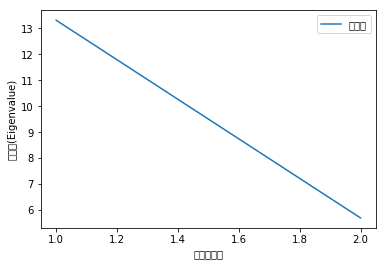

In [13]:
plt.plot(df_pca_stat['PrinNO'],df_pca_stat['Eigen Values'], label='고유값')
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분번호')
plt.legend(loc='best')

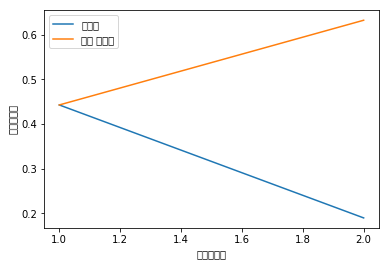

In [14]:
plt.plot(df_pca_stat['PrinNO'],df_pca_stat['Eigen ValueRatio'], label='고유값')
plt.plot(df_pca_stat['PrinNO'],df_pca_stat['CumEigen ValueRAtio'], label='누적 고유값')
plt.ylabel('고유값비율')
plt.xlabel('주성분번호')
plt.legend(loc='best')

In [16]:
x_cols = pd.DataFrame({'Feature':df_x.columns})

df_eigenvector = pd.concat([x_cols,pd.DataFrame(pca.components_.T*-1, \
                                                columns = ['Prin1','Prin2'])],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2
0,mean radius,-0.219,0.234
1,mean texture,-0.104,0.060
2,mean perimeter,-0.228,0.215
3,mean area,-0.221,0.231
4,mean smoothness,-0.143,-0.186
5,mean compactness,-0.239,-0.152
6,mean concavity,-0.258,-0.060
7,mean concave points,-0.261,0.035
8,mean symmetry,-0.138,-0.190
9,mean fractal dimension,-0.064,-0.367


In [17]:
tmp1 = pd.concat([df_pca, df_y], axis = 1)

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


,Prin1,Prin2
Prin1,1.0,0.0
Prin2,0.0,1.0


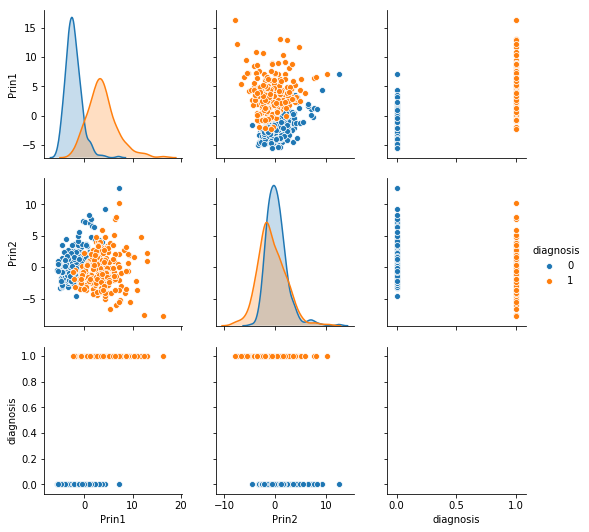

In [18]:
sns.pairplot(tmp1, hue='diagnosis')
df_pca.corr().round(3)

# 1vs3 주성분 분석

In [19]:
pca = PCA(n_components=3)
nd_pca = pca.fit_transform(df_scaled)
print('PCA Data :\n{}'.format(nd_pca[:2]))
print('Shape :\n{}'.format(nd_pca.shape))

PCA Data :
[[ 9.19283683  1.94858343 -1.12316371]
 [ 2.3878018  -3.76817143 -0.529289  ]]
Shape :
(569, 3)


In [20]:
df_pca = pd.DataFrame(nd_pca, columns = ['Prin1','Prin2','prin3'])
df_pca.head()

,Prin1,Prin2,prin3
0,9.192837,1.948583,-1.123164
1,2.387802,-3.768171,-0.529289
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232787
4,3.935302,-1.948071,1.389769


In [21]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNO'] = [I for I in range(1,4)]
df_pca_stat['Eigen Values'] = pca.explained_variance_
df_pca_stat['Eigen ValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigen ValueRAtio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNO,Eigen Values,Eigen ValueRatio,CumEigen ValueRAtio
0,1,13.305,0.443,0.443
1,2,5.701,0.190,0.632
2,3,2.823,0.094,0.726


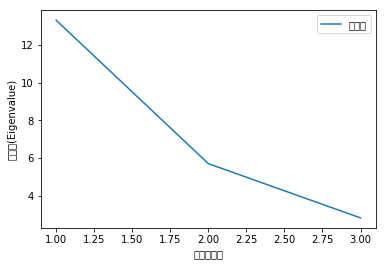

In [22]:
plt.plot(df_pca_stat['PrinNO'],df_pca_stat['Eigen Values'], label='고유값')
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분번호')
plt.legend(loc='best')

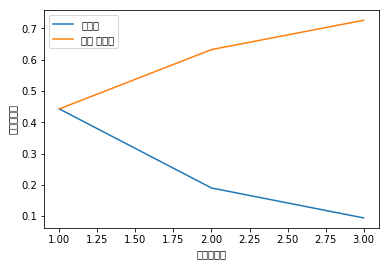

In [23]:
plt.plot(df_pca_stat['PrinNO'],df_pca_stat['Eigen ValueRatio'], label='고유값')
plt.plot(df_pca_stat['PrinNO'],df_pca_stat['CumEigen ValueRAtio'], label='누적 고유값')
plt.ylabel('고유값비율')
plt.xlabel('주성분번호')
plt.legend(loc='best')

In [24]:
x_cols = pd.DataFrame({'Feature':df_x.columns})

df_eigenvector = pd.concat([x_cols,pd.DataFrame(pca.components_.T*-1, \
                                                columns = ['Prin1','Prin2','prin3'])],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,prin3
0,mean radius,-0.219,0.234,0.009
1,mean texture,-0.104,0.060,-0.065
2,mean perimeter,-0.228,0.215,0.009
3,mean area,-0.221,0.231,-0.029
4,mean smoothness,-0.143,-0.186,0.104
5,mean compactness,-0.239,-0.152,0.074
6,mean concavity,-0.258,-0.060,-0.003
7,mean concave points,-0.261,0.035,0.026
8,mean symmetry,-0.138,-0.190,0.040
9,mean fractal dimension,-0.064,-0.367,0.023


In [25]:
tmp2 = pd.concat([df_pca, df_y], axis = 1)

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


,Prin1,Prin2,prin3
Prin1,1.0,0.0,-0.0
Prin2,0.0,1.0,0.0
prin3,-0.0,0.0,1.0


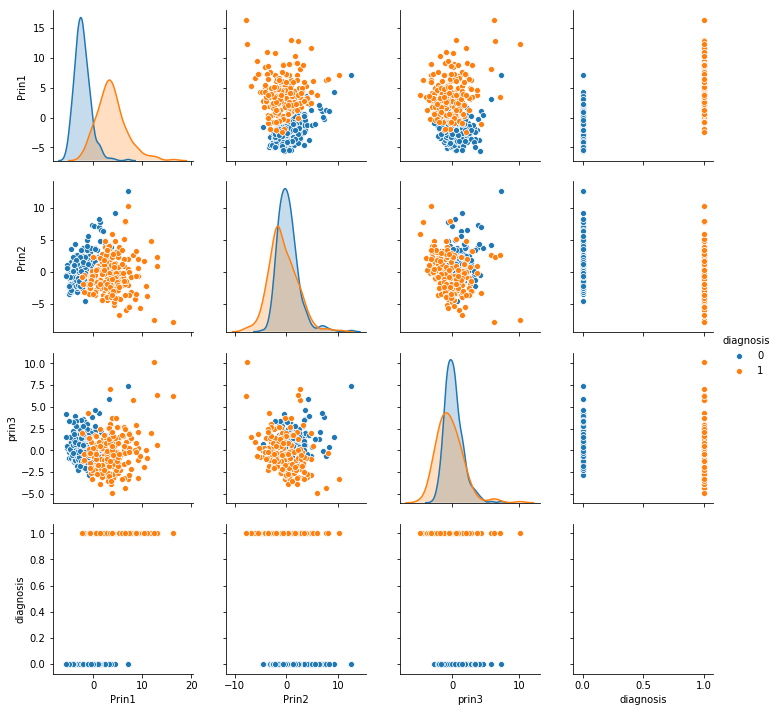

In [26]:
sns.pairplot(tmp2, hue='diagnosis')
df_pca.corr().round(3)